In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "./dataset/training/"
valid_path = "./dataset/validation/"

In [3]:
# useful for getting number of output classes
folders = glob('./dataset/training/*')
folders

['./dataset/training\\1Hundrednote',
 './dataset/training\\2Hundrednote',
 './dataset/training\\2Thousandnote',
 './dataset/training\\5Hundrednote',
 './dataset/training\\Fiftynote',
 './dataset/training\\Tennote',
 './dataset/training\\Twentynote']

In [4]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the MobileNet model pretrained on ImageNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent training
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
Classifier = Sequential()

# Add the MobileNet model as the base
Classifier.add(base_model)

# Add additional layers
Classifier.add(Flatten())
Classifier.add(Dense(units=128, activation='relu'))
Classifier.add(Dense(units=7, activation='softmax'))

# Print the model summary
Classifier.summary()

17235968/17225924 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 9,652,423
Trainable params: 6,423,559
Non-trainable params: 3,228,864
_________________________________________________________________


In [5]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [7]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3173 images belonging to 7 classes.


In [8]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 7 classes.


In [ ]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10
)

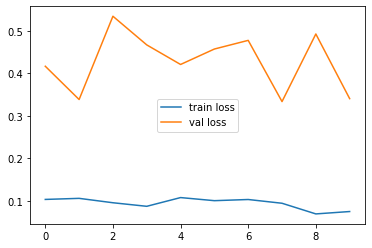

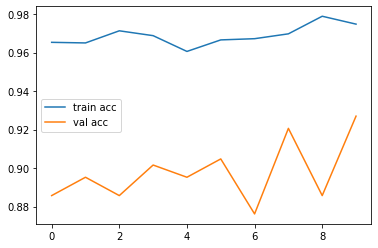

In [16]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [14]:
# save it as a h5 file
Classifier.save('classifiers/MobileNetModel_Classifier_Final.h5')